In [14]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('tabla.xlsx')

# Crear un diccionario para almacenar las correspondencias entre direcciones y DXXX
address_mapping = {}
tx_hash_mapping = {}

# Sustituir los valores en la columna Tx Hash
def replace_tx_hash(tx_hash):
    if tx_hash not in tx_hash_mapping:
        tx_hash_mapping[tx_hash] = f'H{len(tx_hash_mapping) + 1:03}'
    return tx_hash_mapping[tx_hash]

df['Tx Hash'] = df['Tx Hash'].apply(replace_tx_hash)

# Sustituir los valores en las columnas From, To y Tag
def replace_address(address):
    if ' ' in str(address):
        return address  # Mantener las direcciones de Exchange sin cambios
    if address not in address_mapping:
        address_mapping[address] = f'D{len(address_mapping) + 1:03}'
    return address_mapping[address]

df['From'] = df['From'].apply(replace_address)
df['To'] = df['To'].apply(replace_address)
df['Tag'] = df['Tag'].apply(replace_address)

# Crear el DataFrame para la tabla final con las columnas en el orden correcto
df_final = pd.DataFrame(df, columns=df.columns)

# Reemplazar los valores en la columna Tx Hash de tabla_final
df_final['Tx Hash'] = df['Tx Hash']

# Guardar la tabla final en un archivo CSV
df_final.to_csv('tabla_final.csv', index=False)

# Crear el DataFrame para la tabla de direcciones
df_addresses = pd.DataFrame({'DXXX': list(address_mapping.values()), 'Address': list(address_mapping.keys())})

# Guardar la tabla de direcciones en un archivo CSV
df_addresses.to_csv('direcciones.csv', index=False)

# Crear el DataFrame para la tabla de hashes
df_hashes = pd.DataFrame({'HXXX': list(tx_hash_mapping.values()), 'Hash Value': list(tx_hash_mapping.keys())})

# Guardar la tabla de hashes en un archivo CSV
df_hashes.to_csv('hashes.csv', index=False)


In [42]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV en un DataFrame
df = pd.read_csv('tabla_final.csv')

# Crear el gráfico dirigido
G = nx.DiGraph()

# Recorrer el DataFrame y agregar nodos y aristas al gráfico
for index, row in df.iterrows():
    from_node = row['From']
    to_node = row['Tag']
    value = row['Value']
    G.add_edge(from_node, to_node, value=value)

# Obtener la posición de los nodos utilizando el algoritmo hierarchical_layout de NetworkX
pos = nx.hierarchical_layout(G, root='D001')

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.8)

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', width=2)

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

# Dibujar las etiquetas de las aristas
edge_labels = nx.get_edge_attributes(G, 'value')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Mostrar el gráfico
plt.axis('off')
plt.show()



AttributeError: module 'networkx' has no attribute 'hierarchical_layout'

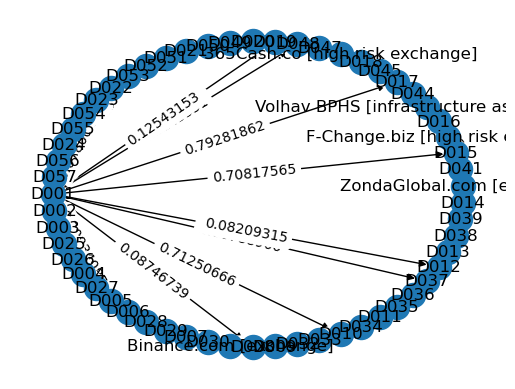

In [8]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

with open('tabla_final.csv', 'r') as f:
    reader = csv.DictReader(f)
    
    for row in reader:
        G.add_edge(row['From'], row['Tag'], value=float(row['Value']))

pos = nx.shell_layout(G)

# Crear nuevo Axes 
ax = plt.subplots()[1]  

# Dibujar en el Axes especificado
nx.draw(G, pos, with_labels=True, ax=ax)

nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'value'), ax=ax)

plt.axis('off')
plt.show()

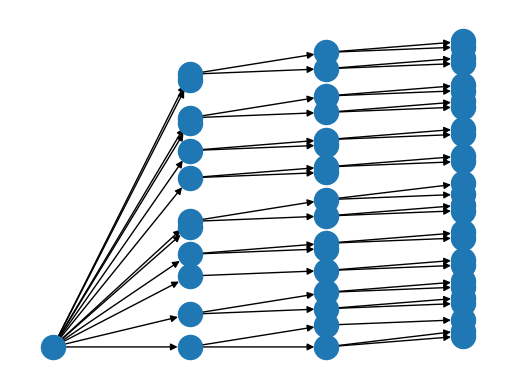

In [8]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

distancia = 100  
distancia_extra = 100

G = nx.DiGraph()

positions = {}

y_actual = 0

with open('tabla_final.csv', 'r') as f:
  reader = csv.DictReader(f)

  x = 0

  for row in reader:
    from_node = row['From']
    to_node = row['Tag']

    if from_node not in positions:
      positions[from_node] = (x, y_actual)
      x += distancia
    
    if to_node not in positions:
      nuevo_x = positions[from_node][0] + distancia
      nuevo_y = y_actual
      
      positions[to_node] = (nuevo_x, nuevo_y)

    if nuevo_x > x:
      x = 0
      
      y_actual += distancia
      
      if y_actual == distancia:
        y_actual += distancia_extra

      elif y_actual == distancia + distancia_extra:
        y_actual += distancia_extra

    G.add_edge(from_node, to_node)    

fig, ax = plt.subplots()
nx.draw(G, pos=positions, ax=ax)

plt.axis('off')
plt.show()